In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def load_and_clean(path):
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip()
    for col in df.select_dtypes(include=["object"]).columns:
        df[col] = df[col].str.strip()
    df = df[pd.to_numeric(df["fold"], errors="coerce").notnull()]
    df = df[df["epoch"] != "N/A"]
    df["fold"] = df["fold"].astype(int)
    df["epoch"] = df["epoch"].astype(int)
    numeric_cols = ["auc",
                    "c@1",
                    "f_05_u",
                    "F1",
                    "brier",
                    "overall",
                    "sub_overall"]
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col])
    return df


def plot_metric(df, metric, title):
    sns.set(style="whitegrid")
    g = sns.relplot(
        data=df,
        x="epoch",
        y=metric,
        hue="fold",
        col="view",
        kind="line",
        marker="o",
        facet_kws={"sharey": False, "sharex": True},
        height=4, aspect=1
    )
    g.fig.suptitle(title, fontsize=16, y=1.05)
    g.set_axis_labels("Epoch", metric)
    g.set(ylim=(0.75, 1.01))
    plt.tight_layout()
    fileified_title = 'full_run_' +\
                      title.replace(' ', '_')\
                           .replace('@', 'at')\
                           .replace(':', '_')\
                           .replace('.', '_')\
                           .replace('_Evaluation_', '')\
                           .lower()
    # plt.savefig('./' + fileified_title + '.png')
    g.savefig('./' + fileified_title + '.png')

In [60]:
df_hedged = load_and_clean(
    '/Users/zacbolton/dev/BSc/FP/Log/full_run_all_eval_hedged_scores/hedged-full_run_all_eval_hedged_scores.csv'
)
df_true = load_and_clean(
    '/Users/zacbolton/dev/BSc/FP/Log/full_run_all_eval_hedged_scores/true-full_run_all_eval_true_scores.csv'
)

AttributeError: 'Figure' object has no attribute 'title'

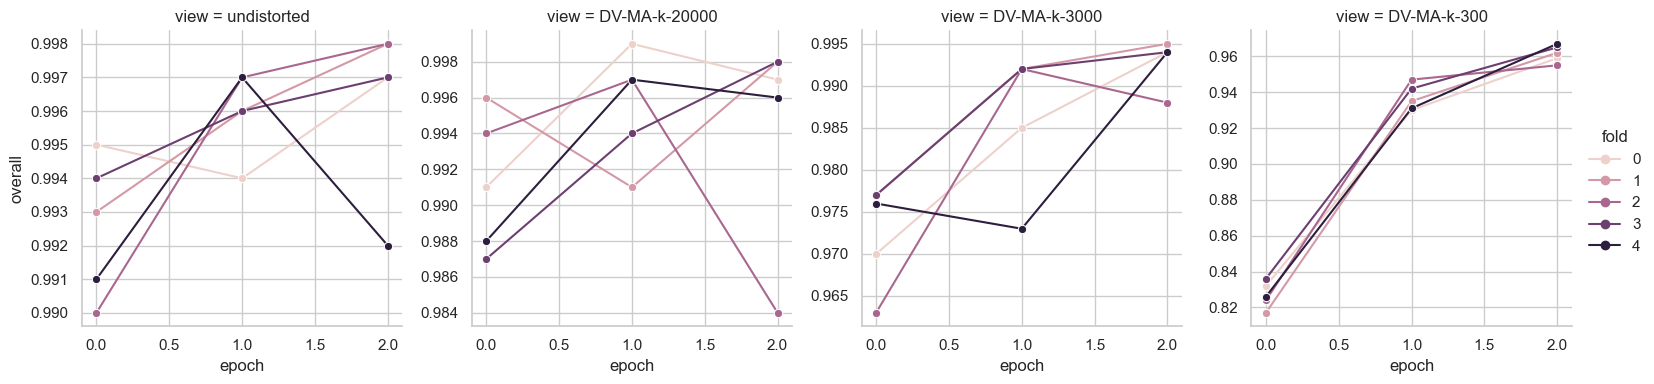

In [61]:
plot_metric(df_hedged, "overall", "Hedged Evaluation: Overall Score Progression")
plot_metric(df_true, "overall", "True Evaluation: Overall Score Progression")

plot_metric(df_hedged, "sub_overall", "Hedged Evaluation: Sub Overall Score Progression")
plot_metric(df_true, "sub_overall", "True Evaluation: Sub Overall Score Progression")

plot_metric(df_hedged, "auc", "Hedged Evaluation: AUC Score Progression")
plot_metric(df_true, "auc", "True Evaluation: AUC Score Progression")

plot_metric(df_hedged, "c@1", "Hedged Evaluation: C@1 Score Progression")
plot_metric(df_true, "c@1", "True Evaluation: C@1 Score Progression")

plot_metric(df_hedged, "f_05_u", "Hedged Evaluation: F0.5u Score Progression")
plot_metric(df_true, "f_05_u", "True Evaluation: F0.5u Score Progression")

plot_metric(df_hedged, "F1", "Hedged Evaluation: F1 Score Progression")
plot_metric(df_true, "F1", "True Evaluation: F1 Score Progression")

plot_metric(df_hedged, "brier", "Hedged Evaluation: Brier Score Progression")
plot_metric(df_true, "brier", "True Evaluation: Brier Score Progression")